In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
from pathlib import Path
from keras.preprocessing import image
import matplotlib.pyplot as plt


In [3]:

p = Path("/content/gdrive/My Drive/Datasets/Pokemon_Dataset") 

dirs = p.glob("*")


image_data = []
labels = []

#Optional
image_paths = []

label_dict = {"Pikachu":0,"Bulbasaur":1,"Meowth":2}
label2pokemon = {0:"Pikachu",1:"Bulbasaur",2:"Meowth"}

for folder_dir in dirs:
    label = str(folder_dir).split("/content/gdrive/My Drive/Datasets/Pokemon_Dataset/")[-1]
    
    cnt = 0
    print(folder_dir)
    
    #Iterate over folder_dir and pick all images of the pokemen
    for img_path in folder_dir.glob("*.jpg"):
        img = image.load_img(img_path,target_size=(40,40))
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        labels.append(label_dict[label])
        cnt += 1
        
    print(cnt)

  

/content/gdrive/My Drive/Datasets/Pokemon_Dataset/Meowth
70
/content/gdrive/My Drive/Datasets/Pokemon_Dataset/Pikachu
199
/content/gdrive/My Drive/Datasets/Pokemon_Dataset/Bulbasaur
174


Visualisation

In [4]:
import numpy as np


In [5]:
print(len(image_data))
print(len(labels))

443
443


In [6]:
import random
random.seed(10)

In [7]:
X=np.array(image_data)
Y=np.array(labels)
from sklearn.utils import shuffle
X,Y=shuffle(X,Y,random_state=2)
#Normalisation
X= X/255.0



In [8]:
print(Y)

[0 1 2 0 1 2 1 2 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0 0 1 1 1 0
 1 2 0 0 1 1 2 2 2 1 1 0 1 1 0 0 0 1 1 1 2 2 2 1 0 0 0 2 2 0 1 2 0 1 1 2 0
 0 0 0 1 1 0 1 1 1 0 0 1 1 0 0 0 2 0 1 1 0 1 0 0 2 0 2 0 2 1 2 2 1 1 0 1 1
 1 1 0 1 1 2 0 2 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 2 2 1 0 1 1 1 1 0 0 0 2
 0 1 0 1 1 0 0 0 1 1 2 1 0 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1 0 2 1 1 0 0 2 1
 0 0 0 1 0 0 0 2 1 0 1 1 1 0 0 0 0 1 1 0 2 0 1 0 2 0 0 2 0 1 0 1 1 2 2 1 0
 1 0 0 0 1 1 0 0 0 0 2 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 2 2 0 1 2 1 1 1 1 0 0
 1 2 2 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 2 2 1 1 1 2 2 0 0 1 1 1 0 0 0 1 1
 0 2 1 1 1 0 0 2 1 1 1 1 1 0 2 1 1 1 1 0 1 0 0 0 1 0 1 2 1 0 0 2 2 2 1 0 0
 0 0 0 1 1 1 0 0 1 2 0 1 0 1 0 0 1 2 0 1 0 1 1 1 0 0 2 0 1 1 2 2 0 1 0 0 1
 2 1 0 0 0 2 1 2 0 0 0 1 1 0 0 1 0 0 0 1 0 1 2 0 1 1 0 2 0 2 0 2 0 0 1 1 0
 0 1 1 0 1 2 2 2 1 2 1 0 0 0 0 1 0 0 1 0 1 1 2 0 1 0 1 0 0 1 0 1 2 0 2 0]


In [9]:
#Draw some pokemons
def drawImg(img,label):
  plt.title(label2pokemon[label])
  plt.imshow(img)
  plt.style.use("seaborn")
  plt.axis("off")
  plt.show()

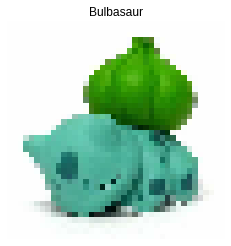

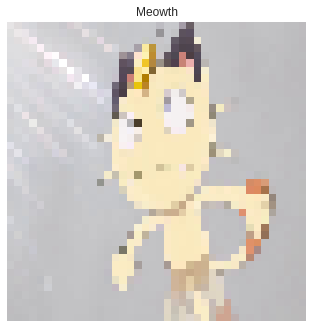

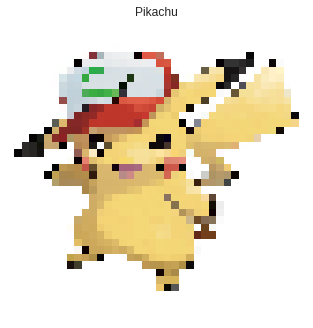

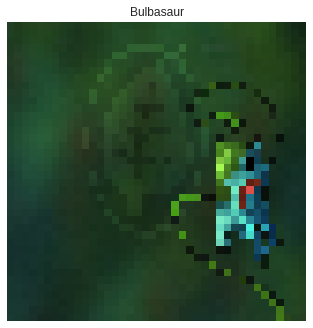

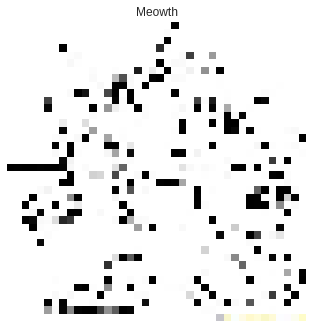

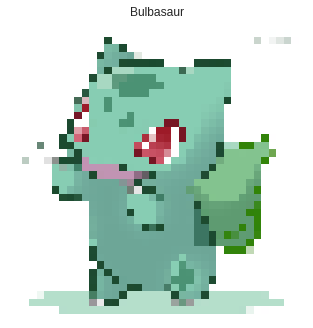

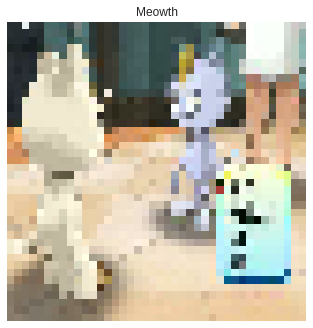

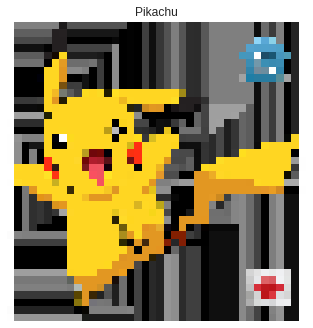

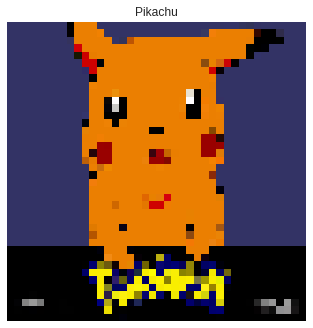

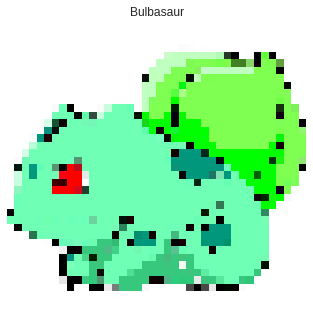

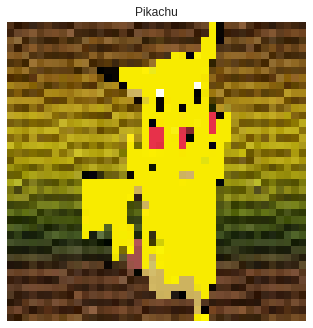

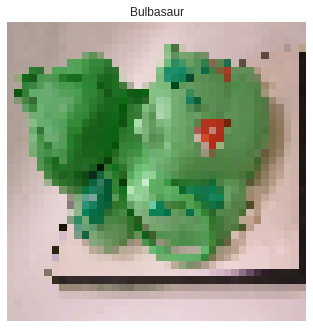

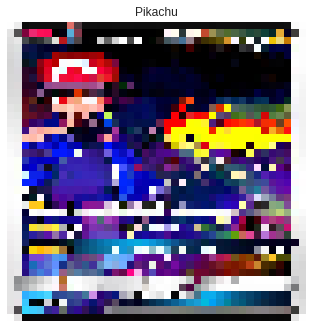

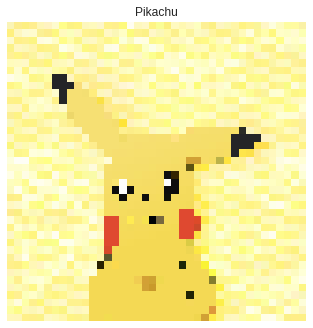

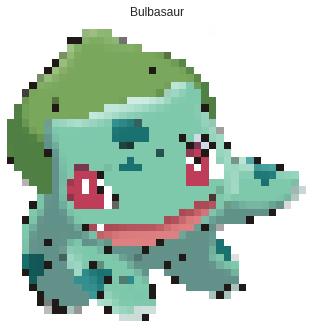

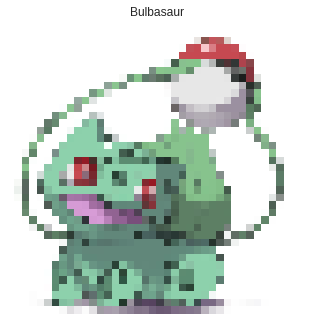

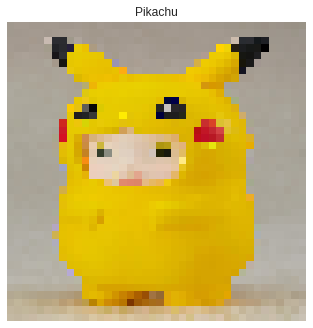

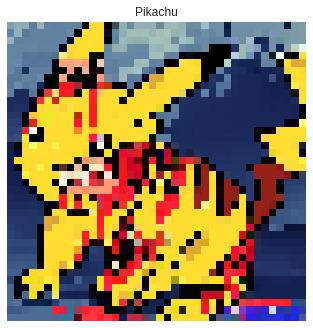

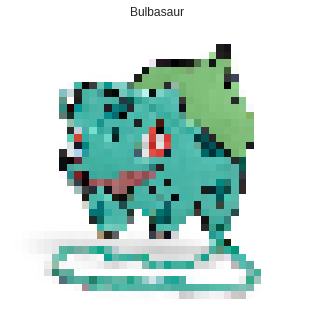

In [10]:
for i in range(1,20):
  drawImg(X[i].reshape(40,40,3),Y[i])

In [11]:
#create Training and Test set
split= int(X.shape[0]*.8)
X_=np.array(X)
Y_=np.array(Y)

#Training set
X=X_[:split,:]
Y=Y_[:split]

#Test set
XTest=X_[split:,:]
YTest=Y_[split:]
print(X.shape,Y.shape)
print(XTest.shape,YTest.shape)

(354, 40, 40, 3) (354,)
(89, 40, 40, 3) (89,)


In [12]:
class NeuralNetwork:
    
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        
        model = {} #Dictionary
        
        #First Layer
        model['W1'] = np.random.randn(input_size,layers[0])
        model['b1'] = np.zeros((1,layers[0]))
        
        #Second Layer
        model['W2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        
        #Third/Output Layer
        model['W3'] = np.random.randn(layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))
        
        self.model = model
        self.activation_outputs = None
    
    def forward(self,x):
        
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1, b2, b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        z1 = np.dot(x,W1) + b1
        a1 = np.tanh(z1) 
        
        z2 = np.dot(a1,W2) + b2
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2,W3) + b3
        y_ = softmax(z3)
        
        self.activation_outputs = (a1,a2,y_)
        return y_
        
    def backward(self,x,y,learning_rate=0.001):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1, b2, b3 = self.model['b1'],self.model['b2'],self.model['b3']
        m = x.shape[0]
        
        a1,a2,y_ = self.activation_outputs
        
        delta3 = y_ - y
        dw3 = np.dot(a2.T,delta3)
        db3 = np.sum(delta3,axis=0)
        
        delta2 = (1-np.square(a2))*np.dot(delta3,W3.T)
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis=0)
        
        delta1 = (1-np.square(a1))*np.dot(delta2,W2.T)
        dw1 = np.dot(X.T,delta1)
        db1 = np.sum(delta1,axis=0)
        
        
        #Update the Model Parameters using Gradient Descent
        self.model["W1"]  -= learning_rate*dw1
        self.model['b1']  -= learning_rate*db1
        
        self.model["W2"]  -= learning_rate*dw2
        self.model['b2']  -= learning_rate*db2
        
        self.model["W3"]  -= learning_rate*dw3
        self.model['b3']  -= learning_rate*db3
        
        # :)
        
    def predict(self,x):
        y_out = self.forward(x)
        return np.argmax(y_out,axis=1)
    
    def summary(self):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_outputs
        
        print("W1 ",W1.shape)
        print("A1 ",a1.shape)

def softmax(a):
    e_pa = np.exp(a) #Vector
    ans = e_pa/np.sum(e_pa,axis=1,keepdims=True)
    return ans

In [13]:
def loss(y_oht,p):
    l = -np.mean(y_oht*np.log(p))
    return l

def one_hot(y,depth):
    
    m = y.shape[0]
    y_oht = np.zeros((m,depth))
    y_oht[np.arange(m),y] = 1
    return y_oht

In [14]:
def train(X,Y,model,epochs,learning_rate,logs=True):
    training_loss = []
    
    classes = len(np.unique(Y))
    Y_OHT = one_hot(Y,classes)
    
    for ix in range(epochs):
        
        Y_ = model.forward(X)
        l = loss(Y_OHT,Y_)
        
        model.backward(X,Y_OHT,learning_rate)
        training_loss.append(l)
        if(logs and ix%50==0):
            print("Epoch %d Loss %.4f"%(ix,l))
            
    
    return training_loss

In [15]:
model=NeuralNetwork(input_size=4800,layers=[100,50],output_size=3) #4800 features

In [16]:
print(X.shape)

(354, 40, 40, 3)


In [17]:
X=X.reshape(X.shape[0],-1)
print(X.shape)
XTest=XTest.reshape(XTest.shape[0],-1)
print(XTest.shape)

(354, 4800)
(89, 4800)


In [18]:
l=train(X,Y,model,500,0.0002)

Epoch 0 Loss 3.2656
Epoch 50 Loss 0.2460
Epoch 100 Loss 0.1127
Epoch 150 Loss 0.0755
Epoch 200 Loss 0.0502
Epoch 250 Loss 0.0384
Epoch 300 Loss 0.0314
Epoch 350 Loss 0.0268
Epoch 400 Loss 0.0231
Epoch 450 Loss 0.0205


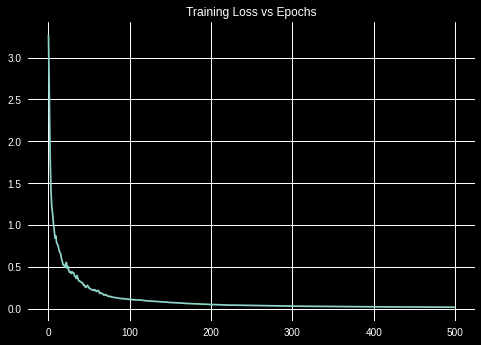

In [19]:
from matplotlib import pyplot as plt
plt.style.use("dark_background")
plt.title("Training Loss vs Epochs")
plt.plot(l)

plt.show()

In [20]:
# Accuracy 
def getAccuracy(X,Y,model):
    outputs = model.predict(X)
    acc = np.sum(outputs==Y)/Y.shape[0]
    return acc
    
print("Train Acc %.4f"%getAccuracy(X,Y,model))
print("Test Acc %.4f"%getAccuracy(XTest,YTest,model))

Train Acc 0.9944
Test Acc 0.5730


In [85]:
from sklearn.metrics import confusion_matrix

In [90]:
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns


In [91]:
outputs=model.predict(X)
cnf_matrix=confusion_matrix(outputs,Y)
print(cnf_matrix)

[[157   0   0]
 [  0 143   1]
 [  1   0  52]]


In [106]:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


Confusion matrix, without normalization
[[157   0   0]
 [  0 143   1]
 [  1   0  52]]


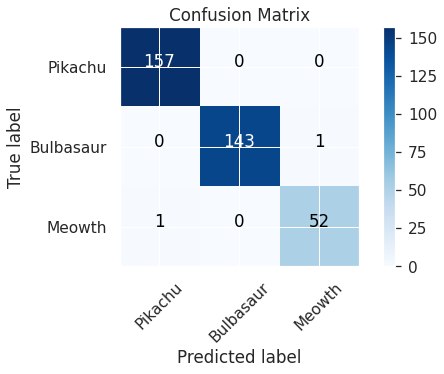

In [107]:
classes=["Pikachu","Bulbasaur","Meowth"]
plot_confusion_matrix(cnf_matrix,classes,title="Confusion Matrix")


In [108]:
from sklearn.metrics import classification_report

In [109]:
print(classification_report(outputs,Y))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       157
           1       1.00      0.99      1.00       144
           2       0.98      0.98      0.98        53

    accuracy                           0.99       354
   macro avg       0.99      0.99      0.99       354
weighted avg       0.99      0.99      0.99       354



              precision    recall  f1-score   support

           0       0.63      0.65      0.64        40
           1       0.61      0.61      0.61        31
           2       0.35      0.33      0.34        18

    accuracy                           0.57        89
   macro avg       0.53      0.53      0.53        89
weighted avg       0.57      0.57      0.57        89

Confusion matrix, without normalization
[[26  6  8]
 [ 9 19  3]
 [ 6  6  6]]


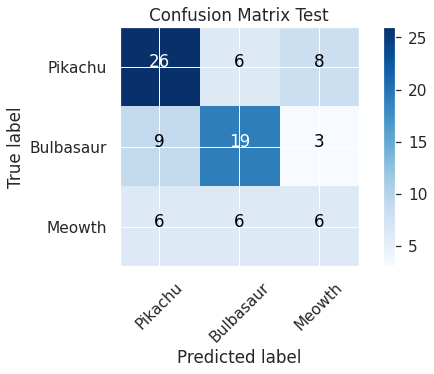

In [110]:
test_outputs = model.predict(XTest)
print(classification_report(test_outputs,YTest))
cnf_matrix = confusion_matrix(test_outputs,YTest)
plot_confusion_matrix(cnf_matrix,classes=["Pikachu","Bulbasaur","Meowth"],title="Confusion Matrix Test")

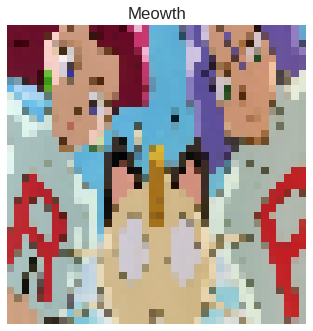

Prediction 297 Bulbasaur


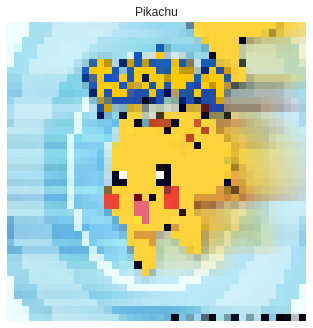

Prediction 333 Meowth


In [111]:
#Visualize Misclassifications
for i in range(Y.shape[0]):
    if Y[i] != outputs[i]:
        drawImg(X[i].reshape(40,40,3),Y[i])
        print("Prediction %d %s"%(i,label2pokemon[outputs[i]]))
